In [1]:
import os
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow import keras  

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
!git clone https://github.com/MarwanMohamed95/Lego-Star-Wars-Minifigures-Classification-Project.git

fatal: destination path 'Lego-Star-Wars-Minifigures-Classification-Project' already exists and is not an empty directory.


In [4]:
names = ["YODA", "LUKE SKYWALKER", "R2-D2", "MACE WINDU", "GENERAL GRIEVOUS"]

In [5]:
train_gen = ImageDataGenerator(rescale=1/255.0)
val_gen = ImageDataGenerator(rescale=1/255.0)
test_gen = ImageDataGenerator(rescale=1/255.0)

In [6]:
train_path = '/content/Lego-Star-Wars-Minifigures-Classification-Project/star-wars images/train'
val_path = '/content/Lego-Star-Wars-Minifigures-Classification-Project/star-wars images/val'
test_path = '/content/Lego-Star-Wars-Minifigures-Classification-Project/star-wars images/test'

In [7]:
train_data = train_gen.flow_from_directory(train_path,target_size=(256,256),
                                           class_mode = 'sparse',batch_size = 4,
                                           shuffle = True,color_mode = 'rgb',classes = names)

Found 37 images belonging to 5 classes.


In [8]:
val_data = train_gen.flow_from_directory(val_path,target_size=(256,256),
                                           class_mode = 'sparse',batch_size = 4,
                                           shuffle = False,color_mode = 'rgb',classes = names)

Found 16 images belonging to 5 classes.


In [9]:
test_data = train_gen.flow_from_directory(test_path,target_size=(256,256),
                                           class_mode = 'sparse',batch_size = 4,
                                           shuffle = False,color_mode = 'rgb',classes = names)

Found 10 images belonging to 5 classes.


In [10]:
images,labels = next(train_data)

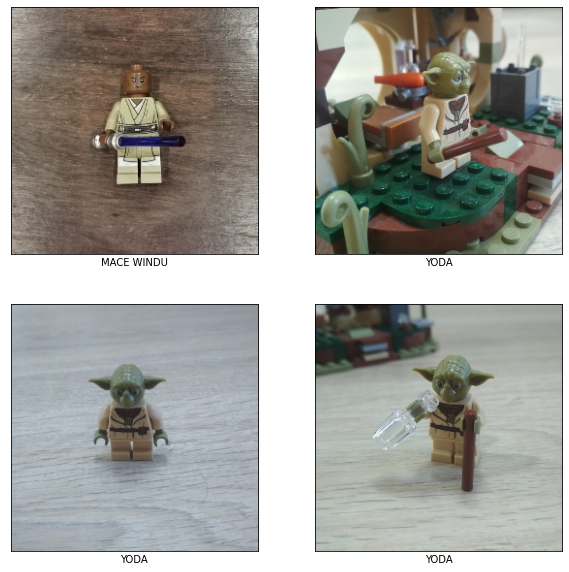

In [11]:
def show(images,labels):
    plt.figure(figsize=(10,10))
    for i in range(len(images)):
        plt.subplot(2,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        lbl = names[int(labels[i])]
        plt.xlabel(lbl)
    plt.show()

show(images,labels)

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), strides=(1,1), padding="valid", activation='relu', input_shape=(256, 256,3)))
model.add(keras.layers.MaxPool2D((2,2)))
#model.add(keras.layers.Conv2D(64, 3, activation='relu'))
#model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(5,activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 516128)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                33032256  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 33,033,477
Trainable params: 33,033,477
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
early_sttoping = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 5,verbose = 2)

In [15]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=2
)
history = model.fit_generator(train_data, validation_data=val_data,
                    callbacks=[early_stopping],
                      epochs=30, verbose=2)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


10/10 - 3s - loss: 32.4485 - accuracy: 0.1081 - val_loss: 4.9026 - val_accuracy: 0.2500
Epoch 2/30
10/10 - 0s - loss: 5.9749 - accuracy: 0.1081 - val_loss: 3.0035 - val_accuracy: 0.2500
Epoch 3/30
10/10 - 0s - loss: 2.9491 - accuracy: 0.2432 - val_loss: 2.6833 - val_accuracy: 0.1875
Epoch 4/30
10/10 - 0s - loss: 1.8629 - accuracy: 0.2973 - val_loss: 1.9393 - val_accuracy: 0.3125
Epoch 5/30
10/10 - 0s - loss: 1.1819 - accuracy: 0.5946 - val_loss: 1.4512 - val_accuracy: 0.4375
Epoch 6/30
10/10 - 0s - loss: 0.8594 - accuracy: 0.7568 - val_loss: 1.4084 - val_accuracy: 0.3750
Epoch 7/30
10/10 - 0s - loss: 0.8068 - accuracy: 0.6757 - val_loss: 1.4259 - val_accuracy: 0.4375
Epoch 8/30
10/10 - 0s - loss: 0.5533 - accuracy: 0.9189 - val_loss: 1.2654 - val_accuracy: 0.5000
Epoch 9/30
10/10 - 0s - loss: 0.4590 - accuracy: 0.8378 - val_loss: 1.2131 - val_accuracy: 0.6875
Epoch 10/30
10/10 - 0s - loss: 0.2717 - accuracy: 0.9730 - val_loss: 0.9657 - val_accuracy: 0.7500
Epoch 11/30
10/10 - 0s - loss

In [16]:
model.evaluate(test_data)

3/3 [==============================] - 0s 31ms/step - loss: 1.0577 - accuracy: 0.6000


[1.0577102899551392, 0.6000000238418579]

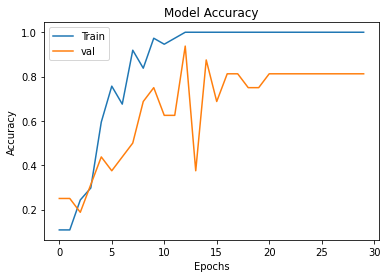

In [17]:
plt.plot(history.history['accuracy'],label = "Train")
plt.plot(history.history['val_accuracy'],label = "val")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


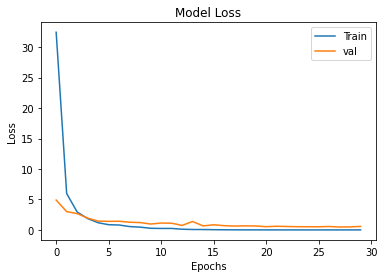

In [18]:
plt.plot(history.history['loss'],label = "Train")
plt.plot(history.history['val_loss'],label = "val")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [19]:
model.predict_classes(test_data)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2, 3, 1, 3, 2, 1, 3, 3, 4, 4])

#**Transfer Learning**

In [32]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [33]:
vgg_model = VGG16()
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [34]:
model_transfer = keras.models.Sequential()
for layer in vgg_model.layers[0:-1]:
  model_transfer.add(layer)

In [35]:
model_transfer.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [36]:
for layer in model_transfer.layers:
  layer.trainable = False

In [37]:
model_transfer.add(keras.layers.Dense(5,activation='softmax'))

In [38]:
model_transfer.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience = 10,verbose = 2)

In [39]:
train_gen_vgg = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
valid_gen_vgg = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)
test_gen_vgg = keras.preprocessing.image.ImageDataGenerator(preprocessing_function=preprocess_input)

In [40]:
train_data_224 = train_gen_vgg.flow_from_directory(
    train_path,
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names   
)

val_data_224 = valid_gen_vgg.flow_from_directory(
    val_path,
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=True,
    color_mode="rgb",
    classes=names
)

test_data_224 = test_gen_vgg.flow_from_directory(
    test_path,
    target_size=(224, 224),
    class_mode='sparse',
    batch_size=4,
    shuffle=False,
    color_mode="rgb",
    classes=names
)

Found 37 images belonging to 5 classes.
Found 16 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [41]:
history = model_transfer.fit(train_data_224, validation_data=val_data_224,
          callbacks=[early_stopping],
          epochs=30, verbose=2)

Epoch 1/30
10/10 - 1s - loss: 1.9140 - accuracy: 0.5135 - val_loss: 0.5449 - val_accuracy: 0.7500
Epoch 2/30
10/10 - 0s - loss: 0.3282 - accuracy: 0.8378 - val_loss: 0.8715 - val_accuracy: 0.6875
Epoch 3/30
10/10 - 0s - loss: 0.0452 - accuracy: 0.9730 - val_loss: 0.3555 - val_accuracy: 0.8125
Epoch 4/30
10/10 - 0s - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.1175 - val_accuracy: 0.9375
Epoch 5/30
10/10 - 0s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0694 - val_accuracy: 1.0000
Epoch 6/30
10/10 - 0s - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 7/30
10/10 - 0s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0555 - val_accuracy: 1.0000
Epoch 8/30
10/10 - 0s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 9/30
10/10 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0591 - val_accuracy: 1.0000
Epoch 10/30
10/10 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0617 - val_accuracy: 1.0000
Epoch 11/30
10/10 -

In [42]:
model_transfer.evaluate(test_data_224)

3/3 [==============================] - 0s 24ms/step - loss: 0.3372 - accuracy: 0.9000


[0.33717700839042664, 0.8999999761581421]

In [43]:
model_transfer.predict_classes(test_data_224)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 1, 3, 2, 2, 3, 3, 4, 4])

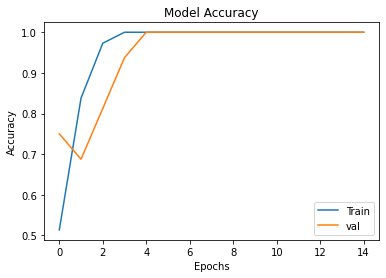

In [44]:
plt.plot(history.history['accuracy'],label = "Train")
plt.plot(history.history['val_accuracy'],label = "val")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

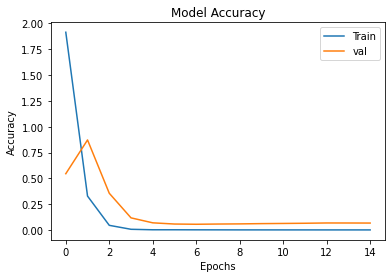

In [45]:
plt.plot(history.history['loss'],label = "Train")
plt.plot(history.history['val_loss'],label = "val")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
